<a href="https://www.kaggle.com/code/alexandrepetit881234/nasa-extra-vehicular-activity?scriptVersionId=140573557" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1><center style='color:white;background:red;border-radius:10px;padding:25px'> Astronauts Extra Vehicular Activity </center></h1>

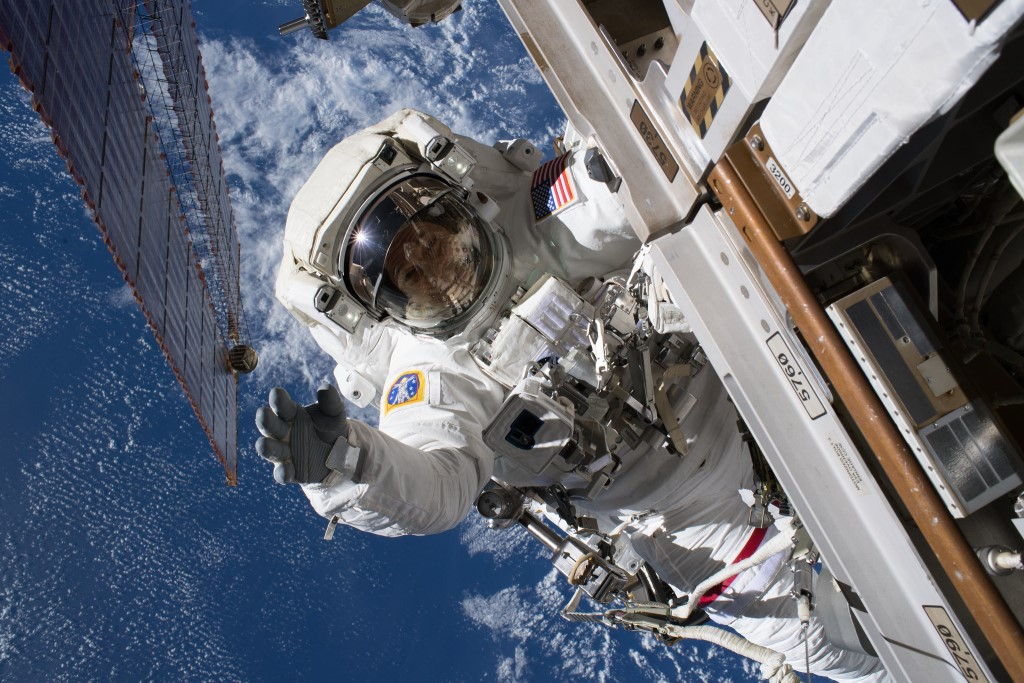

In this notebook we are going to explore all the extra vehicular activity in space

* the data are separated between American and Soviet/Russian EVA
* the time is stored as an object in the format hh:mm, we are going to convert it in minutes
* missing values were filled using data from wikipedia and spacefacts.de

<div>
    <ol>
        <li><a href="#fillna">Filling for missing values</a></li>
        <li><a href="#prog">Creating the 'Program' Column</a></li>
        <li><a href="#viz">Data Visualization</a></li>
        <li><a href="#crew">EVA of each Crew Member</a></li>
        <li><a href="#vehicle">Cleaning Vehicle Names</a></li>
    </ol>
</div>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

/kaggle/input/astronauts-extra-vehicular-activities/astronauts_EVA.csv
/kaggle/input/nasa-extra-vehicular-activity/Extra-vehicular_Activity__EVA__-_US_and_Russia.csv


In [2]:
df = pd.read_csv('/kaggle/input/nasa-extra-vehicular-activity/Extra-vehicular_Activity__EVA__-_US_and_Russia.csv')
df.head()

,EVA #,Country,Crew,Vehicle,Date,Duration,Purpose
0,1.0,USA,Ed White,Gemini IV,06/03/1965,0:36,First U.S. EVA. Used HHMU and took photos. G...
1,2.0,USA,David Scott,Gemini VIII,NaN,0:00,HHMU EVA cancelled before starting by stuck on...
2,3.0,USA,Eugene Cernan,Gemini IX-A,06/05/1966,2:07,"Inadequate restraints, stiff 25ft umbilical an..."
3,4.0,USA,Mike Collins,Gemini X,07/19/1966,0:50,Standup EVA. UV photos of stars. Ended by ey...
4,5.0,USA,Mike Collins,Gemini X,07/20/1966,0:39,Retrieved MMOD experiment from docked Agena. ...


In [3]:
df.drop("EVA #", axis=1, inplace=True)

In [4]:
df.Country.value_counts()

USA       236
Russia    139
Name: Country, dtype: int64

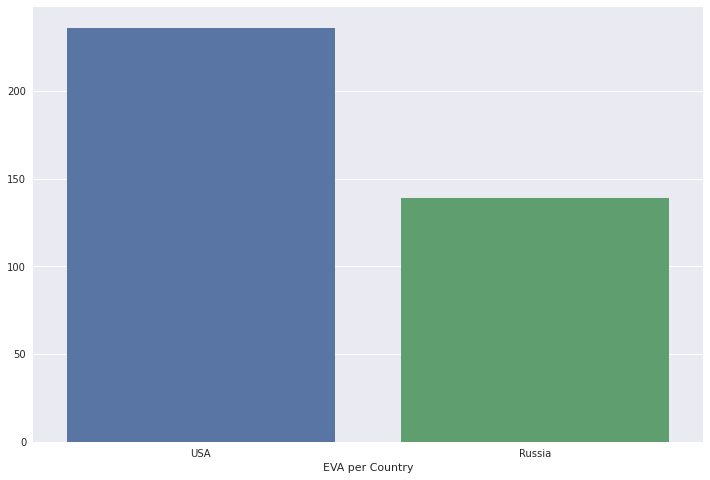

In [5]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Country')
plt.xlabel('EVA per Country')
plt.ylabel(None)
plt.show()

The United States have done more EVAs than Russia

In [6]:
df.Vehicle.unique()

array(['Gemini IV', 'Gemini VIII', 'Gemini IX-A', 'Gemini X', 'Gemini XI',
       'Gemini XII', 'Apollo 9', 'Apollo 11', 'Apollo 12', 'Apollo 14',
       'Apollo 15', 'Apollo 16', 'Apollo 17', 'Skylab 2', 'Skylab 3',
       'Skylab 4', 'STS-5', 'STS-6', 'STS-41B', 'STS-41C', 'STS-41G',
       'STS-51A', 'STS-51D', 'STS-51I', 'STS-61B', 'STS-31', 'STS-37',
       'STS-49', 'STS-54', 'STS-57', 'STS-51 ', 'STS-61 /    HST-1',
       'STS-64 ', 'STS-63', 'STS-69', 'STS-72', nan, 'STS-76', 'STS-80',
       'STS-82 /      HST-2', 'STS-86', 'STS-87', 'STS-88/2A',
       'STS-96/2A.1', 'STS-103/       HST-3A', 'STS-101/2A.2a',
       'STS-106/2A.2b', 'STS-92/3A', 'STS-97/4A', 'STS-98/5A',
       'STS-102/5A.1', 'STS-100/6A', 'STS-104/7A', 'STS-105/7A.1',
       'STS-108/UF1', 'Soyuz TM-4    Mir', 'Incr-4',
       'STS-109/          HST-3B', 'STS-110/8A', 'STS-111/UF2',
       'STS-112/9A', 'STS-113/11A', 'Incr-6', 'STS-114/LF1', 'Incr-12',
       'STS-121 / ULF1.1', 'Incr-13', 'STS-115/12A', '

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   375 non-null    object
 1   Crew      375 non-null    object
 2   Vehicle   374 non-null    object
 3   Date      331 non-null    object
 4   Duration  374 non-null    object
 5   Purpose   371 non-null    object
dtypes: object(6)
memory usage: 17.7+ KB


<h1><center id="fillna" style='color:white;background:red;border-radius:10px;padding:25px'> Filling for Missing Values </center></h1>

In [8]:
df[df['Duration'].isnull()]

,Country,Crew,Vehicle,Date,Duration,Purpose
37,USA,Paul Weitz Joe Kerwin Pete Conrad,Skylab 2,05/25/1973,NaN,"After normal docking failed, all donned suits,..."


In [9]:
df[df['Vehicle'].isnull()]

,Country,Crew,Vehicle,Date,Duration,Purpose
80,USA,Leroy Chiao Winston Scott,NaN,NaN,6:53,"ISS thermal comfort test, cable tray test, APF..."


Leroy Chiao did a total of 6 EVAs. He was part of five missions: STS-65, STS-72, STS-92, and Soyuz TMA-5 (Expedition 10)
Winston Scott was on two missions, STS-72 and STS-87

We have a match! This is the second EVA of STS-72 on January 17 1996

In [10]:
df['Vehicle'].iloc[80] = 'STS-72'
df['Date'].iloc[80] = '01/17/1996'

In [11]:
df.iloc[80]

Country                                                   USA
Crew                       Leroy Chiao          Winston Scott
Vehicle                                                STS-72
Date                                               01/17/1996
Duration                                                 6:53
Purpose     ISS thermal comfort test, cable tray test, APF...
Name: 80, dtype: object

In [12]:
df['Duration'].iloc[37] = "0:00"
df.iloc[37]

Country                                                   USA
Crew         Paul Weitz           Joe Kerwin      Pete Conrad
Vehicle                                              Skylab 2
Date                                               05/25/1973
Duration                                                 0:00
Purpose     After normal docking failed, all donned suits,...
Name: 37, dtype: object

Before converting the Duration column to minutes, we need to know the unit. A quick look at the wikipedia page tell us that the second EVA mission of Gemini X last 39 minutes.
The duration is therefore expressed in the format hours:minutes

In [13]:
df['Duration'] = df.Duration.str.split(':')
df['Duration_hour'] = df.Duration.str[0]
df['Duration_minutes'] = df.Duration.str[1]
df.head()

,Country,Crew,Vehicle,Date,Duration,Purpose,Duration_hour,Duration_minutes
0,USA,Ed White,Gemini IV,06/03/1965,"[0, 36]",First U.S. EVA. Used HHMU and took photos. G...,0,36
1,USA,David Scott,Gemini VIII,NaN,"[0, 00]",HHMU EVA cancelled before starting by stuck on...,0,00
2,USA,Eugene Cernan,Gemini IX-A,06/05/1966,"[2, 07]","Inadequate restraints, stiff 25ft umbilical an...",2,07
3,USA,Mike Collins,Gemini X,07/19/1966,"[0, 50]",Standup EVA. UV photos of stars. Ended by ey...,0,50
4,USA,Mike Collins,Gemini X,07/20/1966,"[0, 39]",Retrieved MMOD experiment from docked Agena. ...,0,39


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           375 non-null    object
 1   Crew              375 non-null    object
 2   Vehicle           375 non-null    object
 3   Date              332 non-null    object
 4   Duration          375 non-null    object
 5   Purpose           371 non-null    object
 6   Duration_hour     375 non-null    object
 7   Duration_minutes  375 non-null    object
dtypes: object(8)
memory usage: 23.6+ KB


In [15]:
df['Duration_hour'] = df['Duration_hour'].astype('float64')
df['Duration_minutes'] = df['Duration_minutes'].astype('float64')

In [16]:
df['Duration'] = df['Duration_minutes'] + df['Duration_hour'] * 60
df.drop(['Duration_minutes', 'Duration_hour'], axis=1, inplace=True)
df.head()

,Country,Crew,Vehicle,Date,Duration,Purpose
0,USA,Ed White,Gemini IV,06/03/1965,36.0,First U.S. EVA. Used HHMU and took photos. G...
1,USA,David Scott,Gemini VIII,NaN,0.0,HHMU EVA cancelled before starting by stuck on...
2,USA,Eugene Cernan,Gemini IX-A,06/05/1966,127.0,"Inadequate restraints, stiff 25ft umbilical an..."
3,USA,Mike Collins,Gemini X,07/19/1966,50.0,Standup EVA. UV photos of stars. Ended by ey...
4,USA,Mike Collins,Gemini X,07/20/1966,39.0,Retrieved MMOD experiment from docked Agena. ...


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   375 non-null    object 
 1   Crew      375 non-null    object 
 2   Vehicle   375 non-null    object 
 3   Date      332 non-null    object 
 4   Duration  375 non-null    float64
 5   Purpose   371 non-null    object 
dtypes: float64(1), object(5)
memory usage: 17.7+ KB


In [18]:
df['Date'].iloc[1] = "03/16/1966"
df['Date'].iloc[79] = '01/15/1996'
df['Date'].iloc[81] = '03/27/1996'
df['Date'].iloc[82] = '11/19/1996'
df['Date'].iloc[83] = '02/14/1997'

df['Date'].iloc[84] = '02/15/1997'
df['Date'].iloc[85] = '02/16/1997'
df['Date'].iloc[86] = '02/17/1997'
df['Date'].iloc[87] = '02/17/1997'
df['Date'].iloc[88] = '10/01/1997'


df['Date'].iloc[120] = '02/26/1998'
df['Date'].iloc[181] = '03/14/2008'
df['Date'].iloc[182] = '03/15/2008'
df['Date'].iloc[183] = '03/17/2008'
df['Date'].iloc[184] = '03/20/2008'

df['Date'].iloc[213] = '02/12/2010'
df['Date'].iloc[214] = '02/14/2010'
df['Date'].iloc[215] = '02/17/2010'
df['Date'].iloc[238] = '03/18/1965'
df['Date'].iloc[239] = '01/16/1969'

df['Date'].iloc[240] = '09/28/1973'
df['Date'].iloc[241] = '12/20/1977'
df['Date'].iloc[245] = '11/01/1983'
df['Date'].iloc[246] = '11/03/1983'
df['Date'].iloc[254] = '02/08/1985'

df['Date'].iloc[260] = '02/26/1988'
df['Date'].iloc[261] = '09/12/1988'
df['Date'].iloc[266] = '02/01/1990'
df['Date'].iloc[267] = '02/05/1990'
df['Date'].iloc[281] = '02/21/1992' 

df['Date'].iloc[283] = '09/03/1992'
df['Date'].iloc[284] = '09/03/1992'
df['Date'].iloc[291] = '10/22/1993'
df['Date'].iloc[292] = '10/29/1993'
df['Date'].iloc[293] = '09/09/1994'

df['Date'].iloc[303] = '10/20/1995'
df['Date'].iloc[304] = '12/08/1995'
df['Date'].iloc[305] = '02/08/1996'
df['Date'].iloc[306] = '03/15/1996'
df['Date'].iloc[312] = '12/02/1996'

df['Date'].iloc[313] = '12/09/1996'
df['Date'].iloc[354] = '06/01/2006' #expedition 13 had another EVA on 08/03/2006, 5:54, Jeffrey Williams and Thomas Reiter
df['Date'].iloc[361] = '12/23/2008' #expedition 18 had another EVA on 03/10/2009, same crew

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<h1><center id='prog' style='color:white;background:red;border-radius:10px;padding:25px'> Creating the 'Program' Column</center></h1>

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   375 non-null    object 
 1   Crew      375 non-null    object 
 2   Vehicle   375 non-null    object 
 3   Date      375 non-null    object 
 4   Duration  375 non-null    float64
 5   Purpose   371 non-null    object 
dtypes: float64(1), object(5)
memory usage: 17.7+ KB


In [20]:
df.columns = ['Country', 'Crew', 'Vehicle', 'Date', 'Duration', 'Purpose']

In [21]:
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Date', 'Country', 'Vehicle', 'Duration', 'Crew', 'Purpose']]
df.head()

,Date,Country,Vehicle,Duration,Crew,Purpose
0,1965-06-03,USA,Gemini IV,36.0,Ed White,First U.S. EVA. Used HHMU and took photos. G...
1,1966-03-16,USA,Gemini VIII,0.0,David Scott,HHMU EVA cancelled before starting by stuck on...
2,1966-06-05,USA,Gemini IX-A,127.0,Eugene Cernan,"Inadequate restraints, stiff 25ft umbilical an..."
3,1966-07-19,USA,Gemini X,50.0,Mike Collins,Standup EVA. UV photos of stars. Ended by ey...
4,1966-07-20,USA,Gemini X,39.0,Mike Collins,Retrieved MMOD experiment from docked Agena. ...


In [22]:
df['Year'] = df['Date'].dt.year

In [23]:
program_map = {"Gem.*": "Gemini","Apo.*": "Apollo", "Sky.*": "Skylab", "STS.*": "Space Shuttle",
               ".*Mir.*": "Mir", ".*Salyut.*": "Salyut", "ISS.*": "ISS", "Incr-.*": "ISS",
              'Voskhod.*': "Voskhod", 'Soyuz.*': "Soyuz"}

df['Program'] = df['Vehicle']

for key, values in program_map.items():
        df['Program'] = df['Program'].str.replace(key, values, regex=True)
df.head()

,Date,Country,Vehicle,Duration,Crew,Purpose,Year,Program
0,1965-06-03,USA,Gemini IV,36.0,Ed White,First U.S. EVA. Used HHMU and took photos. G...,1965,Gemini
1,1966-03-16,USA,Gemini VIII,0.0,David Scott,HHMU EVA cancelled before starting by stuck on...,1966,Gemini
2,1966-06-05,USA,Gemini IX-A,127.0,Eugene Cernan,"Inadequate restraints, stiff 25ft umbilical an...",1966,Gemini
3,1966-07-19,USA,Gemini X,50.0,Mike Collins,Standup EVA. UV photos of stars. Ended by ey...,1966,Gemini
4,1966-07-20,USA,Gemini X,39.0,Mike Collins,Retrieved MMOD experiment from docked Agena. ...,1966,Gemini


In [24]:
df.Program.value_counts()

Space Shuttle    165
Mir               79
ISS               65
Apollo            26
Salyut            16
Skylab            11
Gemini            10
Soyuz              2
Voskhod            1
Name: Program, dtype: int64

<h1><center id='viz' style='color:white;background:red;border-radius:10px;padding:25px'> Data Visualization</center></h1>

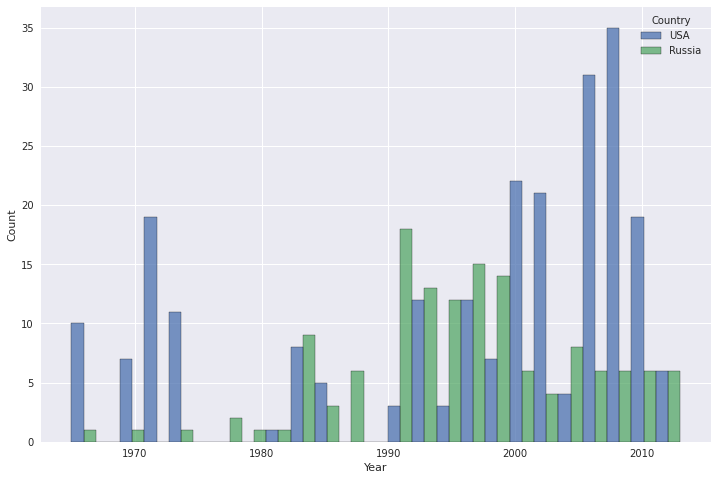

In [25]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='Year', hue='Country', multiple='dodge', bins=25)
plt.show()

During most of history, there were more American extra vehicular activity than Russian, except in the 90s.

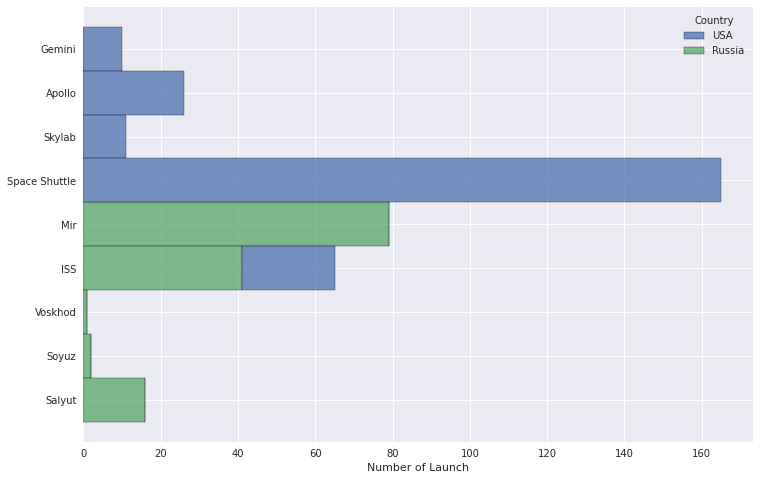

In [26]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, y='Program', hue='Country', multiple='stack')
plt.ylabel(None)
plt.xlabel("Number of Launch")
plt.show()

As a joint program, the ISS flight has been launched from Russia and the United States

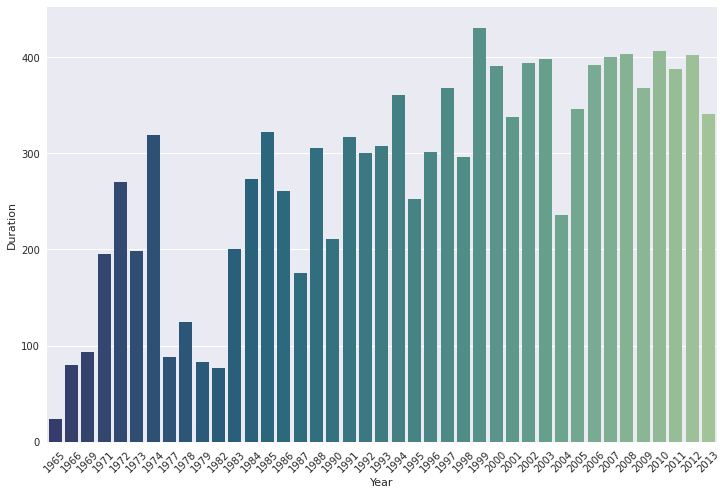

In [27]:
plt.figure(figsize=(12,8))

sns.barplot(data=df, x='Year', y='Duration', ci=None, palette='crest_r')
plt.xticks(rotation=45)
plt.show()

The average time of EVAs have became longer over time

<h1><center id="crew" style="color:white;background:red;border-radius:10px;padding:25px">Number of EVA for each crew member</center></h1>

The team Doug Wheellock - Tracy Caldwell Dyson has their name separated by only one space, we need to add a few more to letter separate them without any problem

In [28]:
df.Crew[df.Crew.str.contains("Doug")].unique()

array(['Scott Parazynski     Doug Wheelock',
       'Doug Wheellock Tracy Caldwell Dyson'], dtype=object)

In [29]:
df['Crew'] = df.Crew.str.replace('Doug Wheellock Tracy Caldwell Dyson',
                                 'Doug Wheellock     Tracy Caldwell Dyson')

In [30]:
df['Crew'] = df.Crew.replace("\s\s+", ", ", regex=True)
df.Crew.value_counts()

Leonid Kizim, Vladimir Solovyov         8
Talgat Musabeyev, Nikola Budarin        6
Yuri Onufrenko, Yuri Usachev            6
Sergei Krikalev, Anatoli Artsebarsky    6
Vladimir Dezhurov, Gennady Strekalov    5
                                       ..
Jeff Williams, Thomas Reiter            1
Bill McArthur, Valeri Tokarev           1
Carl Walz, Dan Bursch                   1
Linda Godwin, Dan Tani                  1
Rick Linnehan, Garrett Reisman          1
Name: Crew, Length: 204, dtype: int64

In [31]:
df['Astronaut'] = df['Crew'].str.split(', ')
astronauts = df[['Astronaut', 'Duration', 'Date']].copy()
df.drop("Astronaut", axis=1, inplace=True)

astronauts = astronauts.explode('Astronaut')
astronauts.head(10)

,Astronaut,Duration,Date
0,Ed White,36.0,1965-06-03
1,David Scott,0.0,1966-03-16
2,Eugene Cernan,127.0,1966-06-05
3,Mike Collins,50.0,1966-07-19
4,Mike Collins,39.0,1966-07-20
5,Richard Gordon,44.0,1966-09-13
6,Richard Gordon,130.0,1966-09-14
7,Buzz Aldrin,149.0,1966-11-12
8,Buzz Aldrin,126.0,1966-11-13
9,Buzz Aldrin,55.0,1966-11-14


In [32]:
astronauts = astronauts.groupby('Astronaut').agg(EVA_number=("Date", "count"),
                                                 EVA_time=("Duration", "sum")).reset_index()
astronauts.head()

,Astronaut,EVA_number,EVA_time
0,,5,1677.0
1,Akihiko Hoshide,3,1283.0
2,Al Worden,1,39.0
3,Alan Shepard,3,567.0
4,Aleksei Yeliseyov,1,37.0


In the first df, some of the string in the "Crew" columns ends with ", ". It creates an empty string.

We can safely delete the first row in our new dataframe

In [33]:
astronauts = astronauts[astronauts['Astronaut'] != ""]

In [34]:
def graph_eva(column):
    astronauts.sort_values(by=column, ascending=False, inplace=True)

    plt.figure(figsize=(12,48))

    sns.barplot(data=astronauts, x=column, y='Astronaut', palette='crest_r')
    plt.ylabel(None)
    plt.show()

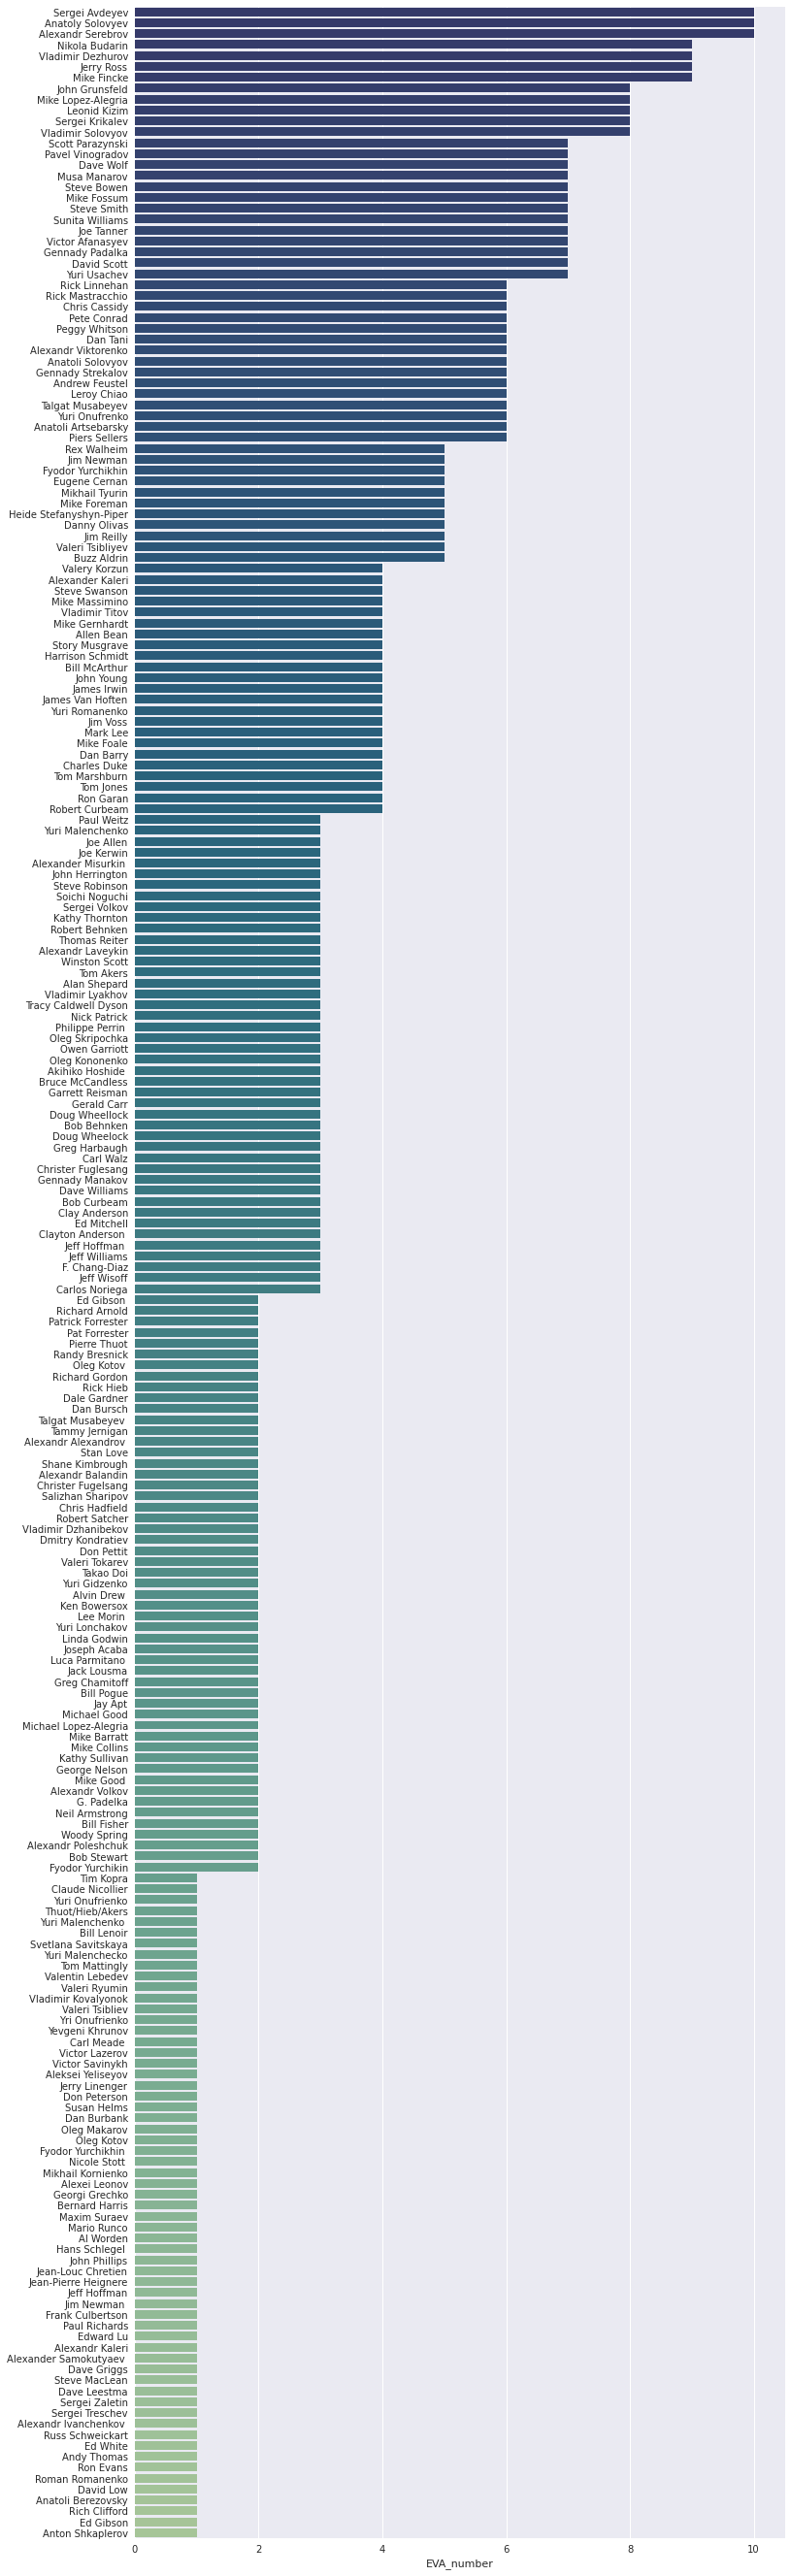

In [35]:
graph_eva('EVA_number')

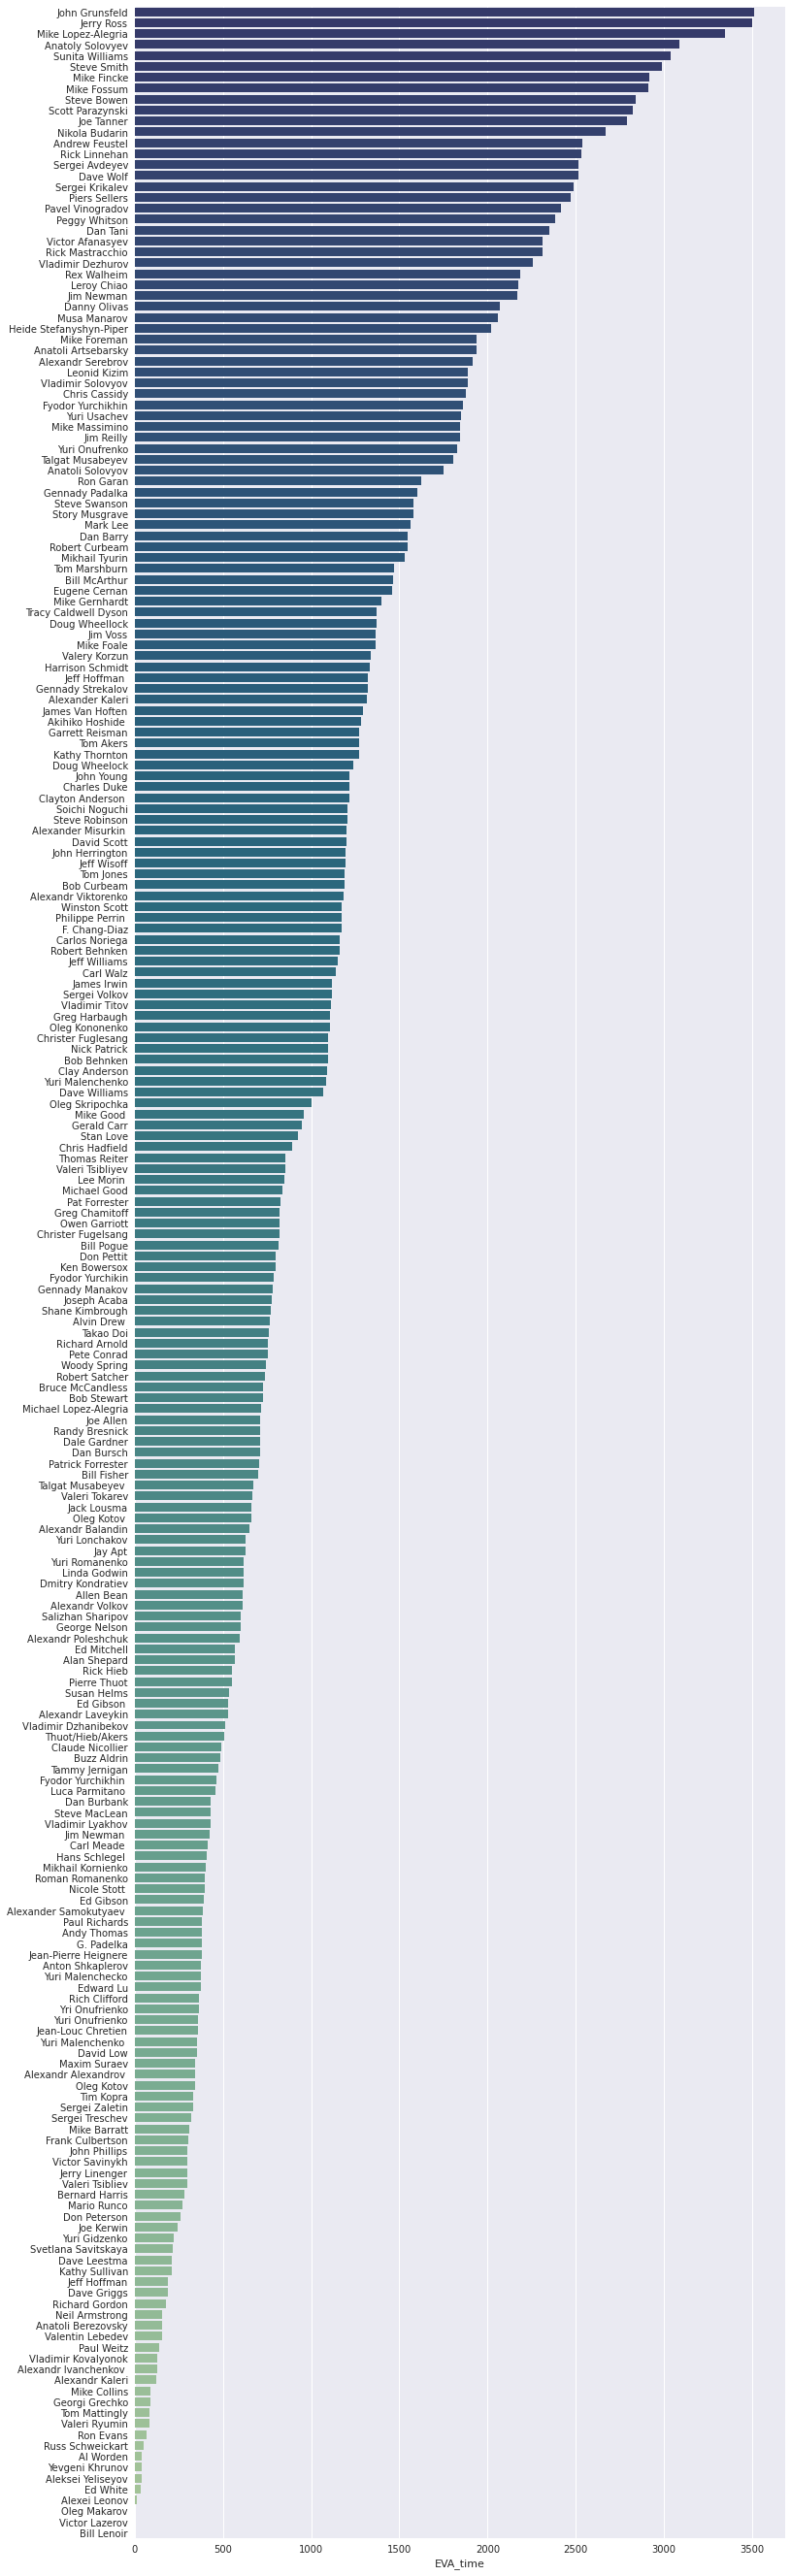

In [36]:
graph_eva('EVA_time')

<h1><center id="vehicle" style='color:white;background:red;border-radius:10px;padding:25px'> Cleaning Vehicle Names </center></h1>

In [37]:
df.Vehicle.unique()

array(['Gemini IV', 'Gemini VIII', 'Gemini IX-A', 'Gemini X', 'Gemini XI',
       'Gemini XII', 'Apollo 9', 'Apollo 11', 'Apollo 12', 'Apollo 14',
       'Apollo 15', 'Apollo 16', 'Apollo 17', 'Skylab 2', 'Skylab 3',
       'Skylab 4', 'STS-5', 'STS-6', 'STS-41B', 'STS-41C', 'STS-41G',
       'STS-51A', 'STS-51D', 'STS-51I', 'STS-61B', 'STS-31', 'STS-37',
       'STS-49', 'STS-54', 'STS-57', 'STS-51 ', 'STS-61 /    HST-1',
       'STS-64 ', 'STS-63', 'STS-69', 'STS-72', 'STS-76', 'STS-80',
       'STS-82 /      HST-2', 'STS-86', 'STS-87', 'STS-88/2A',
       'STS-96/2A.1', 'STS-103/       HST-3A', 'STS-101/2A.2a',
       'STS-106/2A.2b', 'STS-92/3A', 'STS-97/4A', 'STS-98/5A',
       'STS-102/5A.1', 'STS-100/6A', 'STS-104/7A', 'STS-105/7A.1',
       'STS-108/UF1', 'Soyuz TM-4    Mir', 'Incr-4',
       'STS-109/          HST-3B', 'STS-110/8A', 'STS-111/UF2',
       'STS-112/9A', 'STS-113/11A', 'Incr-6', 'STS-114/LF1', 'Incr-12',
       'STS-121 / ULF1.1', 'Incr-13', 'STS-115/12A', 'STS-1

In [38]:
df['Vehicle'] = df.Vehicle.str.replace('Salyut\s[0-9]', '', regex=True)
df['Vehicle'] = df.Vehicle.str.replace('Mir\s[0-9]+', '', regex=True)
df['Vehicle'] = df.Vehicle.str.replace('\s.\s+[A-Za-z0-9]+', '', regex=True)
df['Vehicle'] = df.Vehicle.str.replace('during*', '', regex=True)
df['Vehicle'] = df.Vehicle.str.replace('\s\s+', '', regex=True)
df.Vehicle.unique()

array(['Gemini IV', 'Gemini VIII', 'Gemini IX-A', 'Gemini X', 'Gemini XI',
       'Gemini XII', 'Apollo 9', 'Apollo 11', 'Apollo 12', 'Apollo 14',
       'Apollo 15', 'Apollo 16', 'Apollo 17', 'Skylab 2', 'Skylab 3',
       'Skylab 4', 'STS-5', 'STS-6', 'STS-41B', 'STS-41C', 'STS-41G',
       'STS-51A', 'STS-51D', 'STS-51I', 'STS-61B', 'STS-31', 'STS-37',
       'STS-49', 'STS-54', 'STS-57', 'STS-51 ', 'STS-61-1', 'STS-64 ',
       'STS-63', 'STS-69', 'STS-72', 'STS-76', 'STS-80', 'STS-82-2',
       'STS-86', 'STS-87', 'STS-88/2A', 'STS-96/2A.1', 'STS-103/-3A',
       'STS-101/2A.2a', 'STS-106/2A.2b', 'STS-92/3A', 'STS-97/4A',
       'STS-98/5A', 'STS-102/5A.1', 'STS-100/6A', 'STS-104/7A',
       'STS-105/7A.1', 'STS-108/UF1', 'Soyuz TM-4', 'Incr-4',
       'STS-109/-3B', 'STS-110/8A', 'STS-111/UF2', 'STS-112/9A',
       'STS-113/11A', 'Incr-6', 'STS-114/LF1', 'Incr-12', 'STS-121.1',
       'Incr-13', 'STS-115/12A', 'STS-116/12A.1', 'Incr-14', 'Incr-16',
       'STS-122/1E', 'STS-117/1

In [39]:
df['Vehicle'] = df.Vehicle.str.replace('ISS-Incr', 'ISS Incr')
df['Vehicle'] = df.Vehicle.str.replace('Incr ', 'Incr-')
df['Vehicle'] = df.Vehicle.str.replace('Soyuz 4&5', 'Soyuz 4, Soyuz 5')

In [40]:
df.Vehicle.unique()

array(['Gemini IV', 'Gemini VIII', 'Gemini IX-A', 'Gemini X', 'Gemini XI',
       'Gemini XII', 'Apollo 9', 'Apollo 11', 'Apollo 12', 'Apollo 14',
       'Apollo 15', 'Apollo 16', 'Apollo 17', 'Skylab 2', 'Skylab 3',
       'Skylab 4', 'STS-5', 'STS-6', 'STS-41B', 'STS-41C', 'STS-41G',
       'STS-51A', 'STS-51D', 'STS-51I', 'STS-61B', 'STS-31', 'STS-37',
       'STS-49', 'STS-54', 'STS-57', 'STS-51 ', 'STS-61-1', 'STS-64 ',
       'STS-63', 'STS-69', 'STS-72', 'STS-76', 'STS-80', 'STS-82-2',
       'STS-86', 'STS-87', 'STS-88/2A', 'STS-96/2A.1', 'STS-103/-3A',
       'STS-101/2A.2a', 'STS-106/2A.2b', 'STS-92/3A', 'STS-97/4A',
       'STS-98/5A', 'STS-102/5A.1', 'STS-100/6A', 'STS-104/7A',
       'STS-105/7A.1', 'STS-108/UF1', 'Soyuz TM-4', 'Incr-4',
       'STS-109/-3B', 'STS-110/8A', 'STS-111/UF2', 'STS-112/9A',
       'STS-113/11A', 'Incr-6', 'STS-114/LF1', 'Incr-12', 'STS-121.1',
       'Incr-13', 'STS-115/12A', 'STS-116/12A.1', 'Incr-14', 'Incr-16',
       'STS-122/1E', 'STS-117/1

In [41]:
df.head(25)

,Date,Country,Vehicle,Duration,Crew,Purpose,Year,Program
0,1965-06-03,USA,Gemini IV,36.0,Ed White,First U.S. EVA. Used HHMU and took photos. G...,1965,Gemini
1,1966-03-16,USA,Gemini VIII,0.0,David Scott,HHMU EVA cancelled before starting by stuck on...,1966,Gemini
2,1966-06-05,USA,Gemini IX-A,127.0,Eugene Cernan,"Inadequate restraints, stiff 25ft umbilical an...",1966,Gemini
3,1966-07-19,USA,Gemini X,50.0,Mike Collins,Standup EVA. UV photos of stars. Ended by ey...,1966,Gemini
4,1966-07-20,USA,Gemini X,39.0,Mike Collins,Retrieved MMOD experiment from docked Agena. ...,1966,Gemini
5,1966-09-13,USA,Gemini XI,44.0,Richard Gordon,Attached tether between Agena and Gemini. EVA...,1966,Gemini
6,1966-09-14,USA,Gemini XI,130.0,Richard Gordon,Standup EVA. Took star photos. Agena tether ops,1966,Gemini
7,1966-11-12,USA,Gemini XII,149.0,Buzz Aldrin,Standup EVA. Science tasks. Took star photos,1966,Gemini
8,1966-11-13,USA,Gemini XII,126.0,Buzz Aldrin,Attached tether between Agena and Gemini. UV ...,1966,Gemini
9,1966-11-14,USA,Gemini XII,55.0,Buzz Aldrin,Standup EVA. Jettisoned equipment. Took photos,1966,Gemini


In [42]:
df.to_csv('NASA_Extra_Vehicular_activity_cleaned.csv', index=False)

<h1><center style='color:white;background:red;border-radius:10px;padding:25px'> Summary </center></h1>

In this notebook, we learned about american and russian EVAs.
The data needed a lot of cleaning and preparation. Missing values were filled manually after looking for informations online.

Using regular expressions, it was possible to extract the name of the program from the vehicle name and creating a second dataframe to count the Extra Vehicular Activities of each crew member and their total time.

[The "astronauts" dataframe generated with the notebook is available here](https://www.kaggle.com/datasets/alexandrepetit881234/astronauts-extra-vehicular-activities) 


At first, the astronauts dataframe was created by extracting a list of unique crew members name and then iterating over each row of the original dataframe to count the number of EVAs and the total duration. This lengthy process was replaced by a simple grouby statement after exploding the row of the "Astronaut" temporary column.
This operation done in a very short amount of time compared to the iteration of all the rows